In [1]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import matplotlib.font_manager

Automatically created module for IPython interactive environment


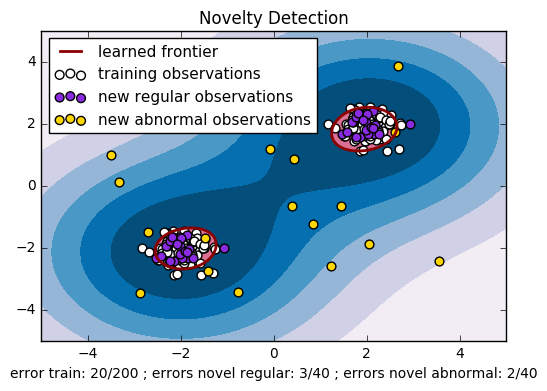

In [3]:
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
# Generate train data
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

# plot the line, the points, and the nearest vectors to the plane
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
temp=Z
Z = Z.reshape(xx.shape)

plt.title("Novelty Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')

s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=s)
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='blueviolet', s=s)
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='gold', s=s)
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b1, b2, c],
           ["learned frontier", "training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.xlabel(
    "error train: %d/200 ; errors novel regular: %d/40 ; "
    "errors novel abnormal: %d/40"
    % (n_error_train, n_error_test, n_error_outliers))
plt.show()


In [4]:
temp

array([[-7.48035584],
       [-7.45800385],
       [-7.43554944],
       ..., 
       [-7.60339115],
       [-7.6235615 ],
       [-7.64364711]])

In [7]:
np.c_[xx.ravel(), yy.ravel()]

array([[-5.        , -5.        ],
       [-4.97995992, -5.        ],
       [-4.95991984, -5.        ],
       ..., 
       [ 4.95991984,  5.        ],
       [ 4.97995992,  5.        ],
       [ 5.        ,  5.        ]])

In [8]:
print X_train
print y_pred_train

[[ 1.78915112  2.20332121]
 [ 2.33102673  1.98954948]
 [ 2.35557014  1.54301556]
 [ 2.27699941  1.51208331]
 [ 1.71429926  2.13570259]
 [ 2.42216584  1.9390629 ]
 [ 2.33303144  1.58736692]
 [ 2.0243899   2.07660904]
 [ 2.33060764  2.47737672]
 [ 2.47205359  2.05908664]
 [ 2.50104565  1.99341077]
 [ 2.34001899  2.29773867]
 [ 1.90465589  2.29527784]
 [ 1.76426377  1.85057165]
 [ 1.69616193  2.1945163 ]
 [ 2.31357825  1.99536265]
 [ 1.67172988  2.11813079]
 [ 1.98763558  2.1801664 ]
 [ 1.83776135  2.53186871]
 [ 2.2291272   1.98554964]
 [ 1.51932073  1.60439648]
 [ 2.07704766  1.69127762]
 [ 2.06992176  1.68685869]
 [ 2.20414963  2.18357318]
 [ 1.96898908  1.74242439]
 [ 1.95906766  1.7052614 ]
 [ 1.94725208  2.20447753]
 [ 2.03962992  2.1311861 ]
 [ 1.88295272  2.17270543]
 [ 1.9581146   1.42255107]
 [ 2.20757367  1.45424998]
 [ 1.81105975  1.97022965]
 [ 1.86994505  1.75861949]
 [ 2.0047537   2.11422097]
 [ 2.01322737  1.69618637]
 [ 1.95854688  1.42165725]
 [ 2.13149595  2.03574723]
 